In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random 

%matplotlib inline


In [2]:
# Derivative function
def f1(y,t):
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    
    dy1 =  y1*y3
    dy2 = -y2*y3
    dy3 = -(y1**2)+y2**2
    return [dy1,dy2,dy3]

In [3]:
# Initial conditions
Dimensions = 1 #1,2,3

x1  = random.random()*((-1)**random.randint(1, 10)) # Random between -1 +1
x2  = random.random()*((-1)**random.randint(1, 10)) # Random between -1 +1
x3  = random.random()*((-1)**random.randint(1, 10)) # Random between -1 +1

if Dimensions == 1:
    y1_0,y2_0,y3_0 = [1.0,0.1*x2,0.0] # y2*x2
    
elif Dimensions == 2:
    y1_0,y2_0,y3_0 = [1.0,0.1*x2,1.0*x3] #y2*x2, y3*x3
else: # 3
    y1_0,y2_0,y3_0 = [1.0*x,1.0*x2,1.0*x3] # y1*x, y2*x2, y3*x3
    

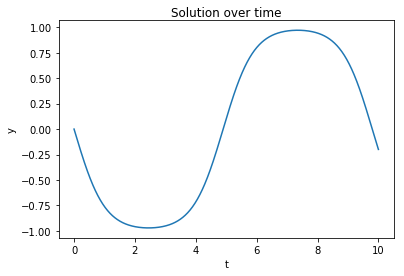

In [4]:
# Solve the equation in time
t0 = 0
tmax = 10
dt = 0.01
t = np.linspace(0, 10, (tmax-t0)/dt)
initial =  y1_0,y2_0,y3_0                 
Result = odeint(f1,initial , t)
    
    
    
plt.plot(t,Result[:,2])
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution over time')
plt.show()
#Result

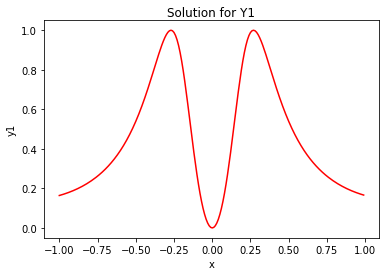

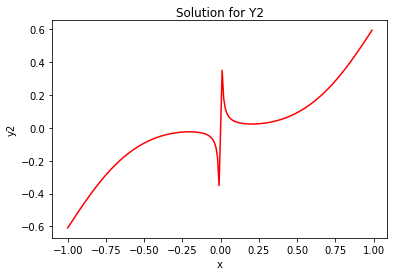

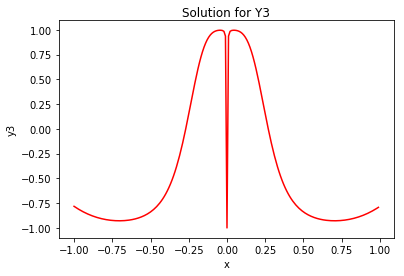

In [5]:
# Loop for all initial conditions in random distribution
t_step = 0.01
Result_t10 = np.zeros((len(np.arange(-1,1,t_step)),3))
tc = 0

for idx in np.arange(-1,1,t_step):
    initial = 1.0,0.1*idx,0.0
    Result = odeint(f1,initial , t)
    Result_t10[tc,0] = Result[-1,0]
    Result_t10[tc,1] = Result[-1,1]
    Result_t10[tc,2] = Result[-1,2]
    tc += 1
    
# Plot                                  
plt.plot(np.arange(-1,1,t_step),Result_t10[:,0],'r')
plt.xlabel('x')
plt.ylabel('y1')
plt.title('Solution for Y1')
plt.show()

plt.plot(np.arange(-1,1,t_step),Result_t10[:,1],'r')
plt.xlabel('x')
plt.ylabel('y2')
plt.title('Solution for Y2')
plt.show()

plt.plot(np.arange(-1,1,t_step),Result_t10[:,2],'r')
plt.xlabel('x')
plt.ylabel('y3')
plt.title('Solution for Y3')
plt.show()


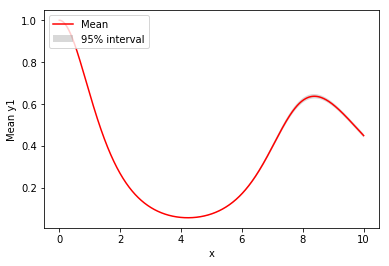

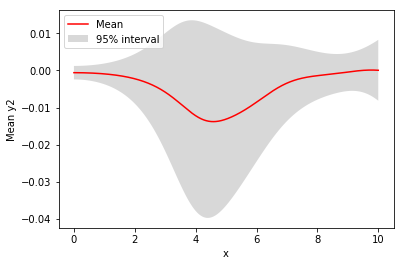

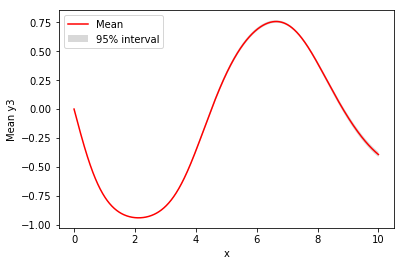

In [8]:
# Monte carlo test

Trials = 4000

    
Result_y1 = np.zeros((len(t),Trials))   
Result_y2 = np.zeros((len(t),Trials))   
Result_y3 = np.zeros((len(t),Trials))   




for trial in np.arange(0,Trials,1):
    x = np.random.uniform(-1, 1, 1) 
    initial =  [1.0,0.1*x,0.0]
    Result_temp = odeint(f1,initial , t)


    Result_y1[:,trial] = Result_temp[:,0]
    Result_y2[:,trial] = Result_temp[:,1]
    Result_y3[:,trial] = Result_temp[:,2]

    t_temp = np.reshape(t,(len(t),1))


    # Get mean and std
Mean_y1 = Result_y1.mean(axis=1)
std_y1 = Result_y1.std(axis=1)

Mean_y2 = Result_y2.mean(axis=1)
std_y2 = Result_y2.std(axis=1)

Mean_y3 = Result_y3.mean(axis=1)
std_y3 = Result_y3.std(axis=1)
    


# Plot
# Plot   Result                               
plt.plot(t,Mean_y1,'r')
plt.fill_between(t, Mean_y1-1.9600 *std_y1/np.sqrt(Trials), Mean_y1+1.9600 *std_y1/np.sqrt(Trials), facecolor='gray', alpha=0.3)
plt.xlabel('x')
plt.ylabel('Mean y1')
plt.legend(['Mean','95% interval'],loc='upper left')
plt.show()

plt.plot(t,Mean_y2,'r')
plt.fill_between(t, Mean_y2-1.9600 *std_y2/np.sqrt(Trials), Mean_y2+1.9600 *std_y2/np.sqrt(Trials), facecolor='gray', alpha=0.3)
plt.xlabel('x')
plt.ylabel('Mean y2')
plt.legend(['Mean','95% interval'],loc='upper left')
plt.show()

plt.plot(t,Mean_y3,'r')
plt.fill_between(t, Mean_y3-1.9600 *std_y3/np.sqrt(Trials), Mean_y3+1.9600 *std_y3/np.sqrt(Trials), facecolor='gray', alpha=0.3)
plt.xlabel('x')
plt.ylabel('Mean y3')
plt.legend(['Mean','95% interval'],loc='upper left')
plt.show()




In [31]:
# Gaussian process (get the data)
random.seed(31415)
# Get the variables to fit
N_samples = 100
t = np.linspace(0, 10, (tmax-t0)/dt)
X1 = np.zeros((N_samples,len(t)))
X2 = np.zeros((N_samples,len(t)))
X3 = np.zeros((N_samples,len(t)))

Y = np.zeros((N_samples,1)) 

for sample in np.arange(0,N_samples-1,1):
    Y[sample] = np.random.uniform(-1, 1, 1) 
    initial =  [1.0,0.1*Y[sample],0.0]
    Result_temp = odeint(f1,initial , t)
    
    t_temp = random.randint(1, len(t))-1

    X1[sample,:] = Result_temp[:,0]
    X2[sample,:] = Result_temp[:,1]
    X3[sample,:] = Result_temp[:,2]
    #Y[sample,0] = Result_temp[t_temp,0]
    #Y[sample,1] = Result_temp[t_temp,1]
    #Y[sample,2] = Result_temp[t_temp,2]
     
    
# Create test variables
Test_length = 4000

X1_test = np.zeros((Test_length,len(t)))
X2_test = np.zeros((Test_length,len(t)))
X3_test = np.zeros((Test_length,len(t)))

Y_test = np.zeros((Test_length,1))

for idx in np.arange(0,Test_length,1):
    Y_test[idx] = np.random.uniform(-1, 1, 1)
    initial =  [1.0,0.1*Y_test[idx],0.0]
    Result_temp = odeint(f1,initial , t)
    
    X1_test[idx,:] = Result_temp[:,0]
    X2_test[idx,:] = Result_temp[:,1]
    X3_test[idx,:] = Result_temp[:,2]
    

score 0.975169189228


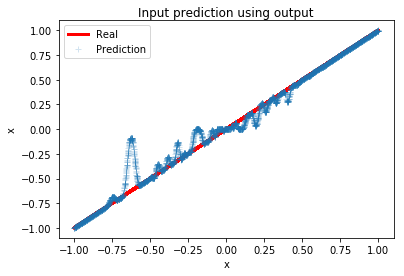

In [26]:
#Gaussian Fit, get input with the output
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

# PCA
pca_conversor = PCA(n_components=3)
pca_conversor.fit(np.hstack((X1,X2,X3)))

X_pca_train = pca_conversor.transform(np.hstack((X1,X2,X3)))
X_pca_test = pca_conversor.transform(np.hstack((X1_test,X2_test,X3_test)))

# Regressors
reg_forest = RandomForestRegressor(n_estimators=100)
gp = GaussianProcessRegressor(random_state = 42, n_restarts_optimizer=1)
reg_svr = SVR()

# Fit
gp = gp.fit(X_pca_train, Y)
#reg_forest = reg_forest.fit(X_pca_train, Y)
#reg_svr = reg_svr.fit(X_pca_train, Y)

# Predict
y_pred, sigma = gp.predict(X_pca_test, return_std=True)

sigma = np.std(y_pred,axis=0)

#sigma = np.reshape(sigma,(len(sigma),1))
#y_pred = reg_forest.predict(X_pca_test)
#y_pred = reg_svr.predict(X_pca_test)

print 'score ' + str(r2_score(Y_test,y_pred))

# Plot
plt.plot(Y_test,Y_test,'r',LineWidth = 3)
plt.plot(Y_test,y_pred,'+',alpha = 0.2)

length = np.reshape(np.arange(0,len(y_pred),1),(len(y_pred),1))


plt.xlabel('x')
plt.ylabel('x')
plt.legend(['Real','Prediction'],loc='upper left')
plt.title('Input prediction using output')
plt.show()



Parameters rayleigh (-1.1049303358997564, 0.89493162066539389)
Parameters expon (-0.99845989687923675, 1.1941035609655359)
Parameters logistic (0.036406965717182979, 0.33349215662495896)
Parameters norm (0.03197346246532802, 0.55615006581106741)
Parameters uniform (-0.99884299643786068, 1.9976091604676816)


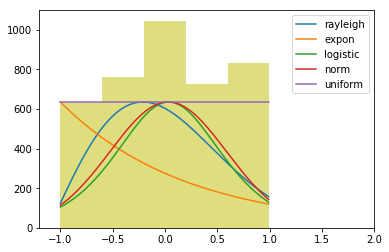

L2 error rayleigh: [ 321.14065798]
L2 error expon: [ 413.62092281]
L2 error logistic: [ 301.87420422]
L2 error norm: [ 287.6125902]
L2 error uniform: [ 281.05978012]
The best distribution was: uniform
The maximum is: 0.998766161767. The minimum: -0.998459896163


In [29]:
# Fit data to distribution
#dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 
#'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 
#'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 
#'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 
#'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 
#'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 
#'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 
#'t', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 
#'wrapcauchy'] 
import scipy.stats
import scipy
from sklearn.metrics import mean_squared_error

x = np.arange(np.min(y_pred),np.max(y_pred),0.01)
dist_names = ['rayleigh', 'expon', 'logistic', 'norm', 'uniform']
h = plt.hist(y_pred, bins = 5 ,color='y',alpha = 0.5)
scores = np.zeros((len(dist_names),1))

t = 0
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y_pred)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) 
    pdf_fitted = pdf_fitted*(scipy.stats.mode(h[0])[0][0]/np.max(pdf_fitted))
    plt.plot(x,pdf_fitted, label=dist_name)
    plt.xlim(-1.2,2)
    
    # Error
    pdf_error = dist.pdf(h[1][1:], *param[:-2], loc=param[-2], scale=param[-1]) 
    pdf_max = np.max(pdf_error)
    pdf_error = pdf_error*(np.max(h[0])/pdf_max) #scipy.stats.mode(h[0])[0][0]
    scores[t] = np.sqrt(mean_squared_error(pdf_error,h[0])) #r2score

    t += 1
    
    print 'Parameters '+dist_name+' ' + str(param)
    
plt.legend(loc='upper right')
plt.show()

# Print scores
t = 0
for score in scores:    
    print 'L2 error ' + dist_names[t] +': ' +str(score)
    t += 1
    
# Best model
Best_distribution = dist_names[np.argmin(np.abs(scores))]
dist = getattr(scipy.stats, dist_name)
param = dist.fit(y_pred)
print 'The best distribution was: ' + Best_distribution
print 'The maximum is: ' + str(np.max(y_pred)) +'. The minimum: ' + str(np.min(y_pred))


Input to output score 0.913285077211


C:\Users\Y50-70\Anaconda2\lib\site-packages\sklearn\metrics\regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


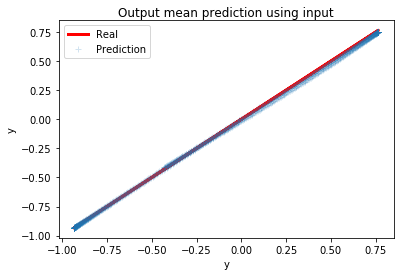

R2 score with monte carlo: 0.99974937706


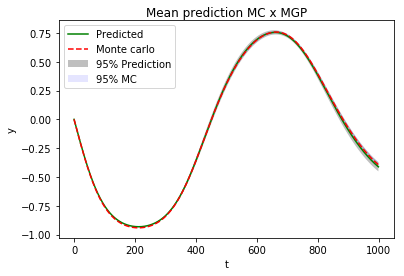

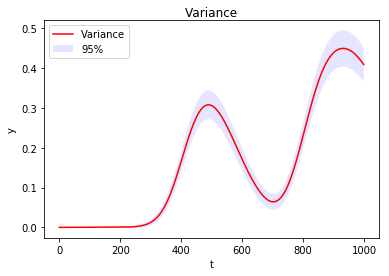

In [42]:
#Gaussian Fit, get output with the input

X_train_out = Y
X_test_out = Y_test

Y_train_out = X3#np.hstack((X1,X2,X3))
Y_test_out = X3_test#np.hstack((X1_test,X2_test,X3_test))

# Regressor
gp = GaussianProcessRegressor(random_state = 42, n_restarts_optimizer=1)

# Fit
gp = gp.fit(X_train_out, Y_train_out)
#reg_forest = reg_forest.fit(X_pca_train, Y)
#reg_svr = reg_svr.fit(X_pca_train, Y)

# Predict
y_pred, sigma = gp.predict(X_test_out, return_std=True)
sigma = np.reshape(sigma,(len(sigma),1))
#y_pred = reg_forest.predict(X_pca_test)
#y_pred = reg_svr.predict(X_pca_test)

# Get values
Mean_test = np.mean(Y_train_out,axis=0)
Mean_values = np.mean(y_pred,axis=0)
std_values = np.std(y_pred,axis=0)
Var_values = np.var(y_pred,axis=0)
Mean_1 = Mean_values
#Mean_2 = Mean_values[1000:2000]
#Mean_3 = Mean_values[2000:]

# Input to output result
print 'Input to output score ' + str(r2_score(Y_test_out,y_pred))

plt.plot(Mean_test,Mean_test,'r',LineWidth = 3)
plt.plot(Mean_test,Mean_values,'+',alpha = 0.2)
plt.xlabel('y')
plt.ylabel('y')
plt.legend(['Real','Prediction'],loc='upper left')
plt.title('Output mean prediction using input')
plt.show()


# Error from monte carlo
print 'R2 score with monte carlo: ' + str(r2_score(Mean_y3,Mean_1))


plt.plot(Mean_1,'g')
plt.plot(Mean_y3,'r--')

length = np.arange(0,len(Mean_1),1)
plt.fill_between( length,Mean_1-1.9600 *std_values/np.sqrt(len(Mean_values)), Mean_1+1.9600 *std_values/np.sqrt(len(Mean_values)), facecolor='gray', alpha=0.5)# No idea why doens't work
plt.fill_between(length, Mean_y3-1.9600 *std_y3/np.sqrt(Trials), Mean_y3+1.9600 *std_y3/np.sqrt(Trials), facecolor='b', alpha=0.1)


plt.xlabel('t')
plt.ylabel('y')
plt.legend(['Predicted','Monte carlo','95% Prediction','95% MC'],loc='upper left')
plt.title('Mean prediction MC x MGP')
plt.show()



# Plot variance
plt.plot(Var_values,'r')
plt.fill_between(length, Var_values-1.9600 *std_y3/np.sqrt(len(Mean_values)), Var_values+1.9600 *std_y3/np.sqrt(len(Mean_values)), facecolor='b', alpha=0.1)

plt.xlabel('t')
plt.ylabel('y')
plt.title('Variance')
plt.legend(['Variance','95%'])
plt.show()

In [18]:
np.mean(y_pred,axis=0).shape
Mean_values = np.mean(y_pred,axis=0)
Mean_1 = Mean_values[:1000]
Mean_2 = Mean_values[1000:2000]
Mean_3 = Mean_values[2000:]

In [39]:
y_pred.shape

(4000L, 1000L)

In [13]:
np.mean(Mean_y3)

-0.11922482224349187